## *SECTION 1 / SPRINT 1 / NOTE 4*

---

# 기초 미분 (Basic Derivative)

## 학습 목표 

- 최적화와 미분의 관계에 대해 알아봅니다
- 미분, 편미분, Chain Rule의 차이를 이해하고 계산을 할 수 있게 됩니다.
- 도함수를 파이썬으로 직접 구현하거나 scipy 라이브러리를 활용해서 구할 수 있습니다.

# 미분 (Derivative)
<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Tangent_to_a_curve.svg/1200px-Tangent_to_a_curve.svg.png' width="400" height="300">

데이터 사이언스를 공부한다면 수학은 피할 수 없는 숙명과도 같은 존재입니다. <br>
특히 미분이란 단어가 생소하신 분들도 많이 계실 것 입니다. 혹은 미분의 ㅁ만 들어도 소름이 돋으시는 분들도 계실 수도 있습니다.<br>
하지만 미분은 여러분이 생각하시는 것만큼 무시무시하고 어려운 개념이 아닙니다. <br>
오늘은 미분이 어떤 것인지를 이해하고 연습을 통해서 미분이라는 벽을 넘어보도록 하겠습니다

## 미분이란?

미분이란 단어는 작을 미(微)와 나눌 분(分). 즉 "작게 나눈다"라는 의미입니다. 
무엇을 작게 나누는 것일까요? 바로 **함수**입니다.

### 함수?
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/Function_machine2.svg/2880px-Function_machine2.svg.png" width='300' height='400'>
함수는 간단하게 x라는 값을 넣으면 f(x)라는 결과값을 내보내주는 기계를 생각하시면 됩니다.<br>
자주 쓰이는 예시는 세탁기를 생각해보시면 됩니다. `세탁물(x)`을 넣고, 버튼을 누르면 `깨끗해진 세탁물(f(x))`을 내보내주는 것이죠.
<br>

#### 그럼 함수를 작게 나눈다는 것은 어떤 의미일까요?
함수를 작게 나눈다는 것은 warm-up 영상에서 보셨던 것처럼 X의 값을 아주 아주 미세하게 변화 시킨 후에 입력했을 때 (예를 들면 0.00000000000000000001 혹은 더 0에 최대한 가깝게) 그 결과값이 어떻게 바뀌는지를 보는 것이 미분입니다.<br>
<br>




아래의 그림처럼 $\Delta x$를 점점 0 에 가깝게해서, 순간의 변화량을 측정하고자 하는것이 더 구체적인 목표라 할 수 있습니다.

<img src='https://upload.wikimedia.org/wikipedia/commons/c/cc/Tangent_animation.gif' width='300' height='300'>

그림을 보시면 우리가 계산하고자 하는 것은 $\Delta x$가 한없이 0에 가까워질 때의 기울기를 계산하고자 하는 것이죠.

원론적인, 수학적인 의미를 파고 들면 끝이 없지만 일단 **미분**을

> 특정한 파라미터 값 (`input, x`)에 대해서 나오는 결과값(`output, y`)이 변화하는 정도를 (0에 가까운 부분을 찾기 위해) 계산하는 것.

으로 이해하시면 됩니다.


## 미분이랑 데이터 사이언스는 뭔 상관이 있는건가요?

미분은 그럼 데이터 사이언스를 배우는데 왜 필요한 것일까요?
아래와 같은 데이터 분포가  있다고 가정해보겠습니다.
<br>
오늘은 Simple Linear Regression (단순선형회귀, Section 2에서 더 상세하게 다루게 됩니다) 모델을 기준으로 예시를 들어보겠습니다. <br>
단순선형회귀모델이란 전문용어에 당황하실 필요 없습니다. 간단하게 표현하면 **x로 y를 예측할 수 있는 하나의 선을 그린다**라고 생각하시면 됩니다.


C:\Users\Oldcar\anaconda3\envs\py38r40\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


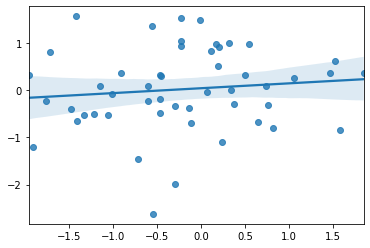

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 랜덤하게 평균0, 표준편차1의 가우시안 표준정규분포 난수 x, y를 50개씩 뽑습니다
np.random.seed(42)  # 동일한 결과를 보기 위해 시드를 고정합니다. https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html
x = np.random.randn(50)
y = np.random.randn(50)

# 산점도를 통해 x,y를 시각화 합니다.
sns.regplot(x, y)
plt.show()

x를 넣었을 때, y 값을 예측하는 선형 모델은 다음과 같이 표현할 수 있습니다 : 

$\hat y = a + b X$

여기서 $\alpha$는 y-절편 (y-intercept), $\beta$는 기울기 (slope) 입니다. 

그럼 모델이 더 정확하게 실제값을 예측하기 위해서는 어떻게 해야할까요?<br>

일단 주어진 데이터 X를 넣었을 떄 모델이 예측하는 예측값과 실제값 간의 차이(**Error, $\varepsilon$**)를 계산한 다음,  여러 모델 중 **Error**(모델에서 예측하는 예측값과 실제값 (y)의 차이)가 가장 작은 모델을 선택하는 방법을 통해, **가장 좋은 모델**을 선택 할 수 있습니다.

여기서 이 과정은 $f(a,b) = \varepsilon$ 로 표현 될 수 있으며, 오차 함수인 $\varepsilon$을 최소화 하는 $a,b$를 찾는 것이 머신러닝(`Linear regression`)의 목표입니다.

선형회귀모델의 경우 오차 함수는 보통 [Mean Squared Error](https://developers.google.com/machine-learning/crash-course/descending-into-ml/training-and-loss)를 쓰는데요. 

오차 함수를 최소화하는 $a,b$를 구하기 위해서 우리는 미분을 사용합니다!

미분을 통해서 오차 함수의 도함수($f'(x)$)가 0이 되는 부분 (즉 변화율이 0인 부분)을 찾아서 오차 함수가 최소화되는 $a,b$을 찾는 것입니다.

## 미분 공식 w/ Python

세상에는 다양한 함수가 존재하기 때문에 미분을 하는 방법 또한 매우 많이 존재합니다.

미분의 원리에 대해 깊게 파고들면서 어떻게 함수를 미분해야하는지 이해해가면서 도함수를 도출해내는 것은 이후에 조금 더 복잡한 함수를 다룰 때를 대비해서 매우 좋은 생각 입니다.

하지만 아쉽게도 우리에게 주어진 시간이 너무나도 짧기 때문에 오늘은 대표적인 지름길 몇가지와 여러분이 앞으로 필요하게 될 중요한 방법 몇가지만 다루도록 하겠습니다.

기본적으로 미분은 다음의 공식을 활용합니다: 

  $f'(x) = {f(x + \Delta x) - f(x) \over \Delta x}$, $\Delta x \rightarrow 0$
    
하지만 실제로 0으로 나눌 수는 없기 때문에 0에 매우 근사한 값을 사용하게 됩니다. 보통 $1e-5$ 을 사용하며, 이러한 접근 방식을 `numerical method` 라는 방법으로 표현하기도 합니다.

한편, `numerical method`에서는 조금 더 정확한 측정을 위해 분자에 $f(x + \Delta x) - f(x - \Delta x) \over 2\Delta x$ 를 사용하기도 합니다.

그럼 머신러닝에서 대표적으로 쓰이는 미분 공식들에 대해 알아보겠습니다

1.  $f(x)$ = 상수 $\rightarrow$ $f'(x)$ = 0

f'(x)가 상수 (constant)인 경우에는 x를 아무리 늘리거나 줄여도 늘 같은 숫자이기 때문에 변화가 전혀 없습니다. 그 말은 즉 변화율이 0이기 때문에 미분계수도 늘 0입니다

In [ ]:
# 예시 1 : Numerical Method

# f(x) = 5
def f(x):
    return 5

def numerical_derivative(fx, x):
    delta_x = 1e-5

    return (fx(x + delta_x) - fx(x)) / delta_x

print(numerical_derivative(f, 1))

# 예시 2 : Scipy의 derivative 활용
from scipy.misc import derivative

# 두 방법의 결과값 비교
derivative(f,1, dx=1e-6) == numerical_derivative(f, 1)

0.0


True

2. $f(x) = ax^{n}$ $\rightarrow$ $f'(x) = an{x}^{(n-1)}$

`Power Rule`로도 알려져있는 미분법입니다. x 기준으로 n승을 미분할 경우 n을 내려보내서 곱해준 후, 이후에 n승에서 "하나"를 가져왔기 때문에 빼주는 방법입니다.

예시로 $f(x) = 3x^4 + 10$ 를 미분해보겠습니다.

먼저 4승에서 하나를 내려보내서 앞에 있는 3과 곱해줍니다. (10은 상수이기 때문에 미분을 하면 0이 됩니다)<br>
$f'(x) = (4*3)x^4$

이후에는 4승에서 1을 빼줍니다 ("빌려줬기 때문에")<br>
$f'(x) = (4*3)x^{4-1}$

최종적으로 f(x)의 도함수는 이렇게 계산됩니다.<br>
$f'(x) = 12x^3$

x = 2일 때 f'(x)는 다음과 같습니다<br>
$f'(2) =  96$

In [2]:
# 같은 결과를 numerical method를 활용해서 계산해보겠습니다
def f(x):
    return 3*(x**4) + 10

def numerical_derivative(fx, x):
    delta_x = 1e-5

    return (fx(x + delta_x) - fx(x)) / delta_x

print(numerical_derivative(f, 2))

# 예시 2 : Scipy의 derivative 활용
from scipy.misc import derivative

# 두 방법의 결과값 비교
print(derivative(f,2, dx=1e-5))
derivative(f,2, dx=1e-5) == numerical_derivative(f, 2)  #delta X의 값은 같지만 Rounding 에러로 인해 두 결과가 미묘하게 다른 것을 확인하실 수 있습니다.

96.0007200028201
96.0000000031158


False

3. $f(x) = e^x$ $\rightarrow$ $f'(x) = e^x$

지수 함수의 경우에는 도함수 역시 지수 함수입니다. 어떻게 도함수가 같은지를 증명하는 글을 Reference에 올려놨습니다. 시간이 되실 때 꼭 참고해보시길 바랍니다.

4. $f(x) = lnx$ $\rightarrow$ $f'(x) = {{1} \over {x}} $

자연 로그의 미분은 이후에 여러분이 Section 2에서 배우게 될 Logistic Regression이나 Section 4에서 배우게 될 신경망의 활성 함수인 sigmoid 함수를 미분할 때 상당히 편하게 미분을 할 수 있도록 도와줍니다.

sigmoid 함수에 자연로그를 씌움으로서 미분을 훨씬 수월하게 할 수 있게 되기 때문입니다.

## 편미분 (Partial Derivative) 

상당히 많은 머신러닝의 Error 함수는 여러개의 파라미터 값을 통해 결정됩니다.

이때 쓰이는 것이 편미분인데요, 파라미터가 2개 이상인 Error 함수에서 **우선 1개의 파라미터에 대해서만 미분을 하자** 라는 목적으로 다른 변수들을 상수 취급 하는 방법을 말합니다.

계산 방법을 간단한 예시를 통해 알아보겠습니다.

$$ f(x,y) = x^2 + 2xy + y^2$$

$${ {\partial f(x,y)} \over {\partial x} } = {{\partial {(x^2 + 2xy + y^2)} } \over {\partial x}} = 2x + 2y$$

이렇게 y는 상수로 취급하고 x를 기준으로만 미분하거나 반대로 x를 상수 취급하고 y를 기준으로 미분하는 것이 편미분 입니다.

여전히 편미분이 많은 분들에게 와닿지 않을 거라고 생각합니다.

편미분이 실생활에서 쓰이는 예를 $f=ma$라는 유명한 공식을 통해 설명해보겠습니다.

<img src='https://i.imgur.com/jBdd0VE.jpg' width = '500'>

차량이 받는 힘(충격) = $f$(차체의 무게, 차의 가속도)

현재 차의 무게는 그대로 두고 가속도에 변화를 주는 경우 충격은 어떻게 변화하는가? $\rightarrow$ ${\partial 충격 \over \partial 가속도 }$

현재 가속도는 그대로 두고 차의 무게에 변화를 주는 경우 충격은 어떻게 변화하는가? $\rightarrow$ ${\partial 충격 \over \partial 질량 }$

### 예제
$f(x,y) = x^2 + 4xy + 9y^2$라는 함수의 $f'(1, 2)$의 값을 계산해보겠습니다.

이를 위해서 해야 하는 것은 다음과 같습니다 : 

1. $x$에 대해 편미분 

$\partial f(x,y) \over \partial x$ = $2x + 4y$

${f'(1, 2) \over \partial x}$ = $2 \cdot (1) + 4 \cdot (2) = 10$

2. $y$에 대해 편미분

$\partial f(x,y) \over \partial y$ = $4x + 18y$

${f'(1, 2) \over \partial y}$ = $4 \cdot 1 + 18 \cdot 2 = 40$

# Chain Rule

`Chain Rule`이란 **함수의 함수**를 미분하기 위해 사용하는 방식입니다. 이를 **합성함수** 라고 부르기도 하며

공식은 다음과 같습니다. 

$F(x) = f(g(x))$

$F'(x)$ $\rightarrow$ $f'((g(x)) \cdot g'(x)$

흔히 Chain Rule을 양파까기에 비유를 많이 하는데요. 
양파 껍질을 깔 때 밖에서부터 껍질을 까듯이, Chain Rule 역시 미분을 할 때 바깥 함수($f(x)$)부터 미분을 한 후에 안에 있는 함수 ($g(x)$)를 미분합니다.


### 예제

$F(x) = (2x^3 + 7)^6 $ 를 x에 대해 미분하려는 경우

$f(x) = x^6, g(x) = 2x^3 + 7$로 설정

$F'(x) = 6(2x^3 + 7)^5 \cdot 6x^2$

`Chain Rule`은 `Deep learning`의 핵심 개념 중 하나인 `Backward Propagation`을 이해하는데 중요하기 때문에 시간이 될 때마다 연습을 하는 것이 좋습니다.

# 미분의 실사용 예시 :  경사하강법 (Gradient Descent)

미분이 무엇인지, 파이썬으로는 어떻게 계산하는지, 어떤 때 필요한지 알아보았습니다. 마지막으로 최적화 알고리즘의 대표적인 예시인 경사하강법에 대해 알아보도록 하겠습니다. 경사하강법은 이후에 Section 2, 4에서도 다시 나올 예정이기 때문에 오늘 우리는 경사하강법이 무엇인지와 어떤 원리로 작동하는지에 대해서만 알아보도록 하겠습니다.

## 경사하강법

경사하강법 (Gradient Descent, 이하 GD)는 위에서 거론 됐던 오차 함수인  𝜀 을 최소화 하는  𝑎,𝑏 를 찾을 수 있는 최적화 알고리즘 중의 하나입니다. 강의에서 최적의 a,b를 찾기 위해선 미분계수가 0인 곳을 찾으면 된다고 했습니다. 하지만 현실적으로 우리가 앞으로 다루게 될 문제에선 파라미터의 갯수는 수없이 많을 것이고 하나의 minimum/maximum만이 존재하지 않는 상황에 직면하게 될 것입니다. 

경사하강법은 임의의 a, b를 선택한 후 (random initialization)에 기울기 (gradient)를 계산해서 기울기 값이 낮아지는 방향으로 진행합니다. 기울기는 항상 손실 함수 값이 가장 크게 증가하는 방향으로 진행합니다. 그렇기 때문에 경사하강법 알고리즘은 기울기의 반대 방향으로 이동합니다.

경사하강법에서 a,b는 다음과 같이 계산 됩니다 :

$a_{n+1} = a_n - \eta ∇ f(a_n)$ <br>
$b_{n+1} = b_n - \eta ∇ f(b_n)$

 반복적으로 파라미터 a,b를 업데이트 해가면서 그래디언트($∇ f$)가 0이 될 때까지 이동을 합니다. 이 때 중요한게 바로 학습률 (learning rate, $\eta$)인데요. 학습률이 너무 낮게 되면 알고리즘이 수렴하기 위해서 반복을 많이 해야되고 이는 결국 수렴에 시간을 상당히 걸리게 합니다. 반대로 학습률이 너무 크면 오히려 극소값을 지나쳐 버려서 알고리즘이 수렴을 못하고 계산을 계속 반복하게 될 수도 있기 때문에 학습률을 정할 때는 신중하게 정하셔야 합니다.


### 예시

In [1]:
def gradient_descent(X, y, lr = 0.05, epoch = 10):
    
    a, b = 0.33, 0.48 # 임의 선택한 파라미터 a, b
    N = len(X) # 샘플 갯수
    
    for _ in range(epoch):            
        f = y - (a*X + b)
    
        # a와 b를 업데이트 합니다
        a -= lr * (-2 * X.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)        
        
    print('a: '+str(a))
    print('b: '+str(b))

In [ ]:
# y = 3 x + 5
X = np.array([1, 2, 3, 4, 5])
y = np.array([8, 11, 14, 17, 20])

In [ ]:
gradient_descent(X,y)  # 10번만 돌렸을 때

a: 3.820070615328
b: 2.0392842721280005


In [ ]:
gradient_descent(X, y, epoch = 100)  # 100번 반복

a: 3.176787975497293
b: 4.36173931393391


In [ ]:
gradient_descent(X, y, epoch = 1000)  # 1000번 반복

a: 3.000000038323629
b: 4.999999861639539


점점 a = 3, b = 5로 수렴하시는 것을 보실 수 있습니다.